In [2]:
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("CropRecommendation.csv")

In [6]:
data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [7]:
data.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [8]:
data.shape

(2200, 8)

In [9]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [13]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [105]:
data.nunique()
vec = np.zeros_like(data.N)
data["classNumber"] = vec # add new column in dataframe
data.dtypes              

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
classNumber      int64
dtype: object

In [100]:
print(data.label.unique())
print("Total unique values in Label columns are: ",len(data.label.unique()))

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Total unique values in Label columns are:  22


In [15]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [17]:
crop_summary=pd.pivot_table(data,index=['label'],aggfunc='mean')

In [18]:
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [19]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [20]:
import plotly.express as px

## **DATA VISUALIZATION **

In [32]:
#OUTLIERS DETECTION

In [21]:
fig = px.box(data,y="N",points="all")
fig.show()

In [22]:
fig = px.box(data,y="P",points="all")
fig.show()

In [23]:
fig = px.box(data,y="K",points="all")
fig.show()

In [24]:
fig = px.box(data,y="temperature",points="all")
fig.show()

In [25]:
fig = px.box(data,y="humidity",points="all")
fig.show()

In [27]:

fig = px.box(data,y="ph",points="all")
fig.show()


In [28]:
fig = px.box(data,y="rainfall",points="all")
fig.show()

In [30]:
fig = px.box(data,y="label",points="all")
fig.show()

In [31]:
#REMOVING OUTLIERS

In [41]:
df_boston = data
df_boston.columns = df_boston.columns
df_boston.head()


#IQR
Q1 = np.percentile(df_boston['rainfall'],25, interpolation = 'midpoint')

Q3 = np.percentile(df_boston['rainfall'],75, interpolation = 'midpoint')

IQR = Q3 - Q1

print("New Shape: ",df_boston.shape)

#Upper bound
upper = np.where(df_boston['rainfall'] >= (Q3+1.5*IQR))
#Lower bound
lower = np.where(df_boston['rainfall'] <= (Q1-1.5*IQR))

   


New Shape:  (2101, 8)


In [42]:
  df_boston = data
df_boston.columns = df_boston.columns
df_boston.head()


#IQR
Q1 = np.percentile(df_boston['temperature'],25, interpolation = 'midpoint')

Q3 = np.percentile(df_boston['temperature'],75, interpolation = 'midpoint')

IQR = Q3 - Q1

print("New Shape: ",df_boston.shape)

#Upper bound
upper = np.where(df_boston['temperature'] >= (Q3+1.5*IQR))
#Lower bound
lower = np.where(df_boston['temperature'] <= (Q1-1.5*IQR))

New Shape:  (2101, 8)


In [43]:
df_boston = data
df_boston.columns = df_boston.columns
df_boston.head()


#IQR
Q1 = np.percentile(df_boston['K'],25, interpolation = 'midpoint')

Q3 = np.percentile(df_boston['K'],75, interpolation = 'midpoint')

IQR = Q3 - Q1

print("New Shape: ",df_boston.shape)

#Upper bound
upper = np.where(df_boston['K'] >= (Q3+1.5*IQR))
#Lower bound
lower = np.where(df_boston['K'] <= (Q1-1.5*IQR))

New Shape:  (2101, 8)


In [44]:
data = df_boston

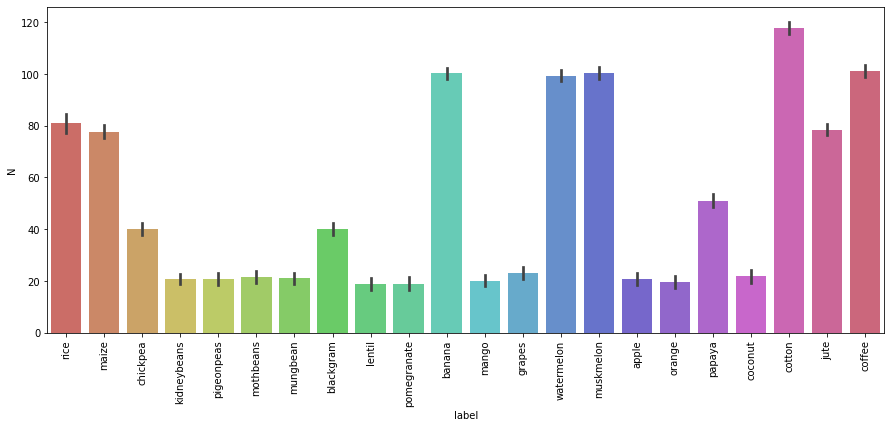

In [46]:
plt.figure(figsize=(15,6))
sns.barplot(y='N',x='label',data=data ,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [47]:
 #pip install plotly

In [48]:
crop_summary_new=data.copy()

In [49]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [50]:
fig1= px.bar(crop_summary_new, x='label', y='N')
fig1.show()

In [101]:
#x-axis "ratio of Nitrogen content in soil", y-axis "ratio of Phosphorous content in soil", colorbar "crop class as number"

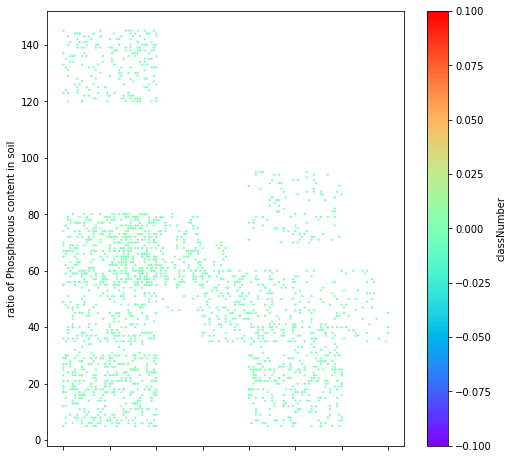

In [106]:
data.plot(kind="scatter", x="N", y="P", c="classNumber", cmap="rainbow", s=1.5, figsize=(8,8),
        xlabel="ratio of Nitrogen content in soil", ylabel="ratio of Phosphorous content in soil")

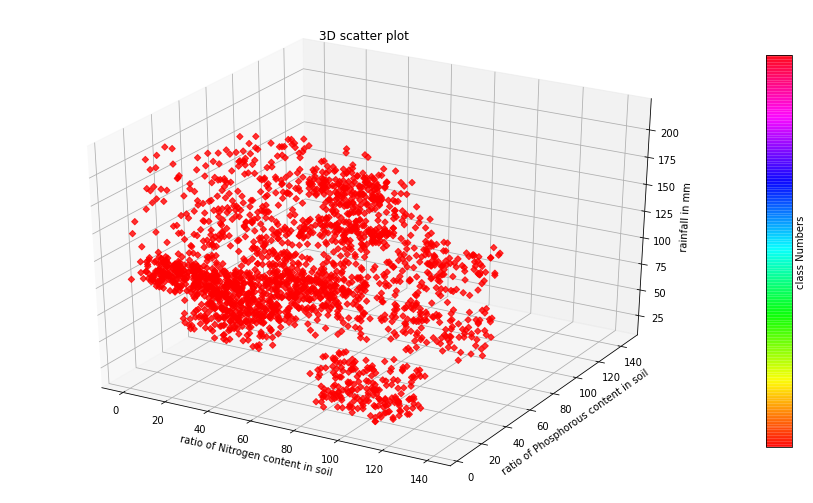

In [108]:
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.3, alpha = 0.2)
# Creating color map
my_cmap = plt.get_cmap('hsv')
# Creating plot
sctt3D = ax.scatter3D(data.N, data.P, data.rainfall, alpha = 0.8, c = data.classNumber, cmap = my_cmap, marker ='D')
plt.title("3D scatter plot")
ax.set_xlabel("ratio of Nitrogen content in soil")
ax.set_ylabel("ratio of Phosphorous content in soil")
ax.set_zlabel("rainfall in mm")
# set colorbar settings
tck = np.arange(1,22,1)
fig.colorbar(sctt3D, ax = ax, shrink = 0.8, aspect = 15, ticks = tck, label="class Numbers")
# show plot
plt.show()

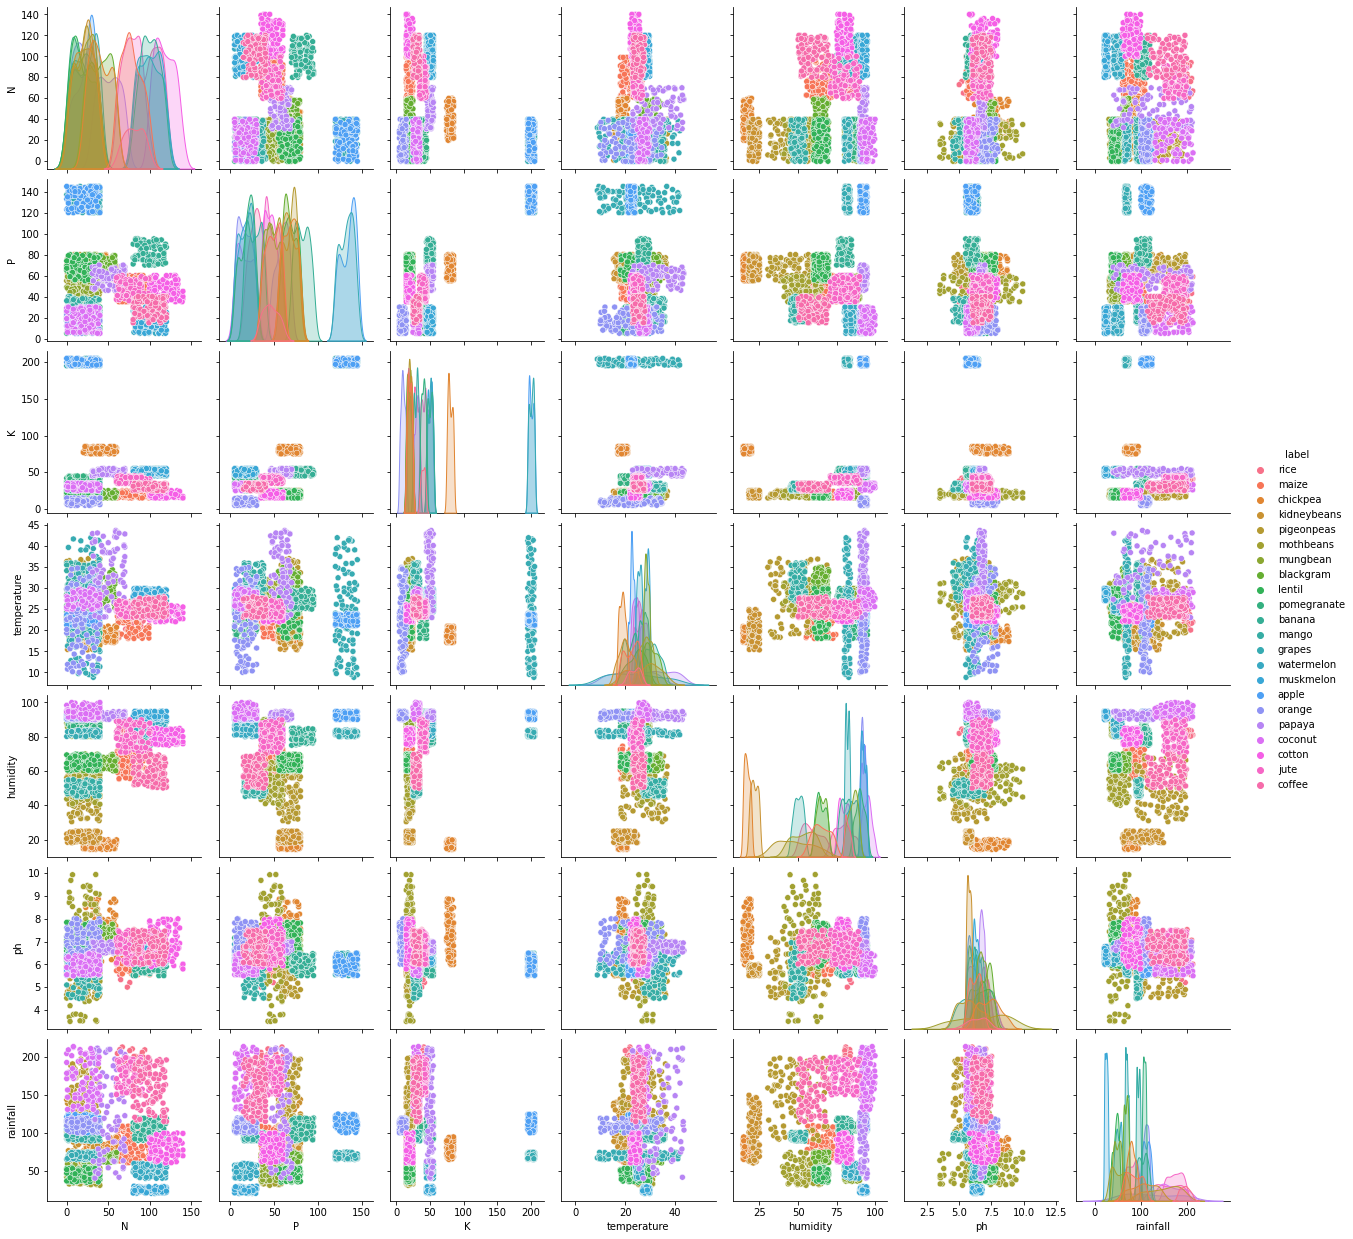

In [109]:
data_plot = data.drop(['classNumber'],axis=1)
sns.pairplot(data_plot, hue = 'label')

In [51]:
import random 
from IPython.core.display import update_display

In [52]:
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.237127,-0.139970,0.041633,0.189609,0.099238,0.003231
P,-0.237127,1.000000,0.737806,-0.133415,-0.111730,-0.146018,-0.046656
K,-0.139970,0.737806,1.000000,-0.165188,0.198119,-0.174559,-0.042466
temperature,0.041633,-0.133415,-0.165188,1.000000,0.203789,-0.021339,-0.039570
humidity,0.189609,-0.111730,0.198119,0.203789,1.000000,-0.005955,0.020846
ph,0.099238,-0.146018,-0.174559,-0.021339,-0.005955,1.000000,-0.127166
rainfall,0.003231,-0.046656,-0.042466,-0.039570,0.020846,-0.127166,1.000000


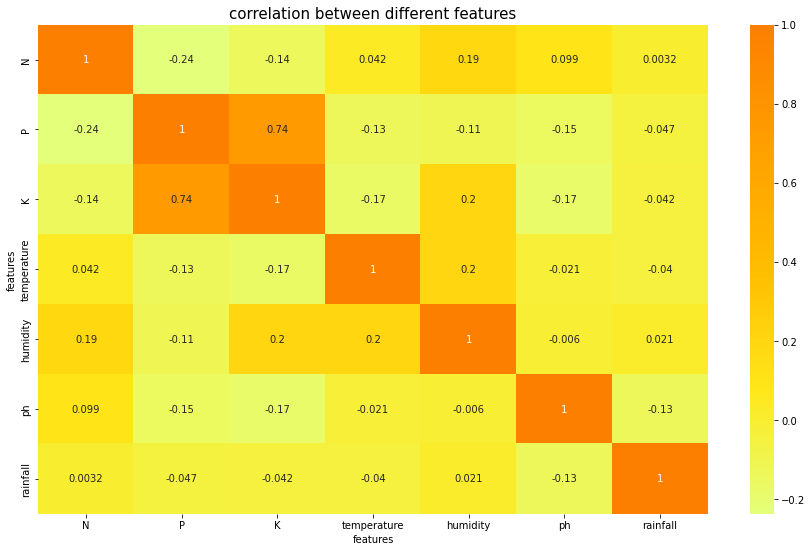

In [60]:
fig,ax=plt.subplots(1,1,figsize=(15,9))
sns.heatmap(data.corr(),annot=True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('correlation between different features',fontsize=15,c='black')
plt.show()

In [61]:
  X=data.drop('label' ,axis =1)
  y=data['label']

In [65]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,shuffle=True,random_state=0)

In [66]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [69]:
y_pred=model.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9905


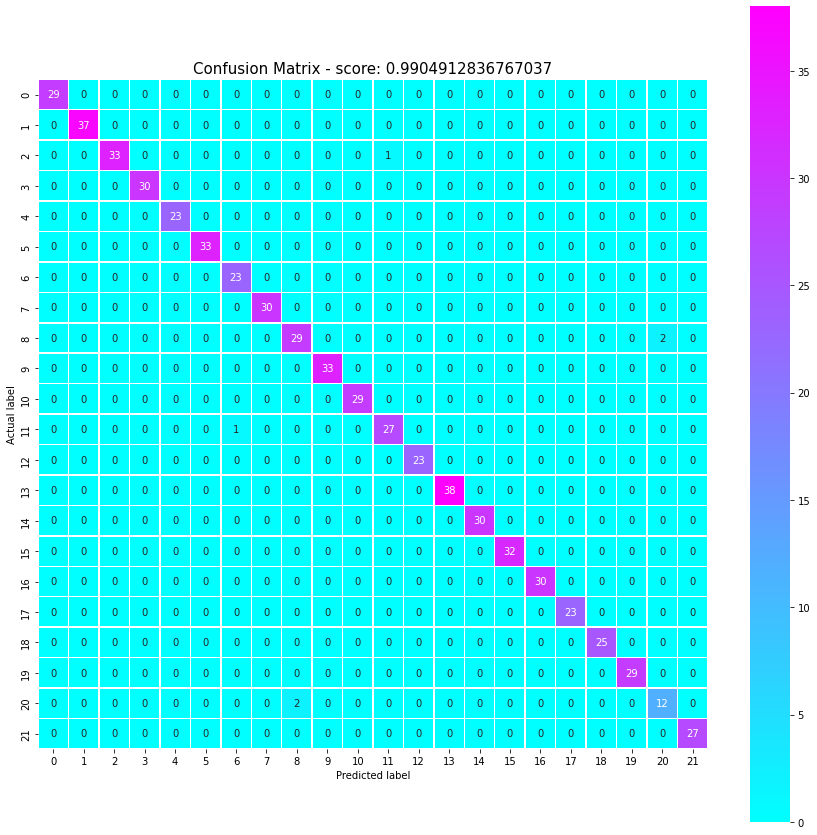

In [116]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidth=.5, square = True, cmap = 'cool');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score: '+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size=15);
plt.show()

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        37
   blackgram       1.00      1.00      1.00        34
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        30
        jute       0.86      1.00      0.93        31
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        29
       maize       1.00      1.00      1.00        28
       mango       1.00      1.00      1.00        23
   mothbeans       0.97      1.00      0.99        38
    mungbean       1.00      0.97      0.98        30
   muskmelon       1.00      1.00      1.00        32
      orange       1.00      1.00      1.00        30
      papaya       1.00    

In [73]:
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [74]:
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [75]:
y_pred=Classifier.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('decision tree model accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

decision tree model accuracy score: 0.9905


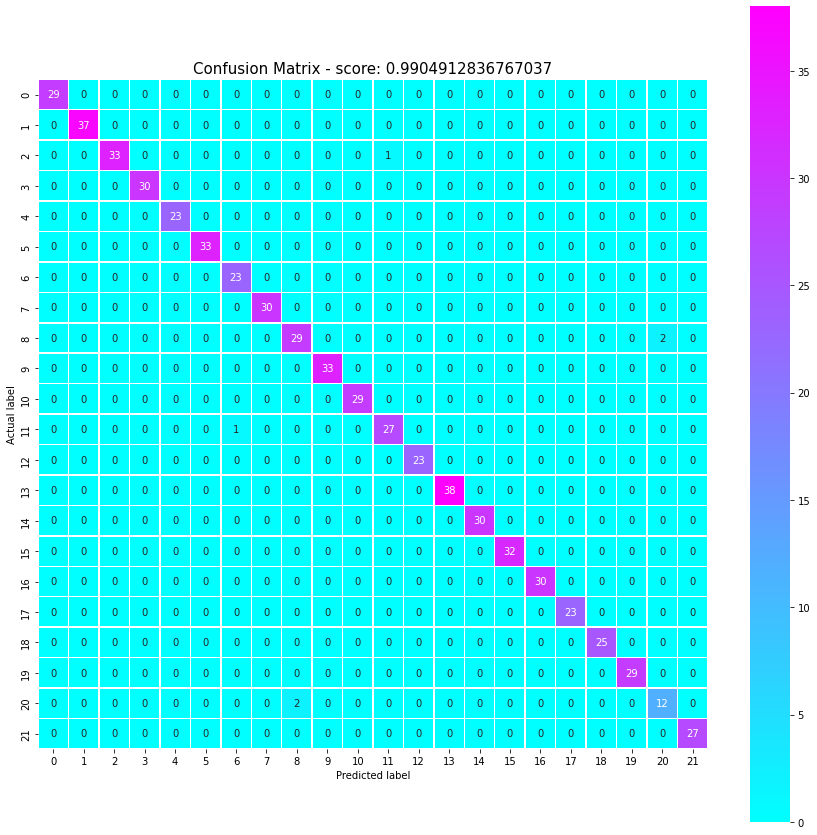

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidth=.5, square = True, cmap = 'cool');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score: '+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size=15);
plt.show()

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        37
   blackgram       1.00      0.97      0.99        34
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        33
      cotton       0.96      1.00      0.98        23
      grapes       1.00      1.00      1.00        30
        jute       0.94      0.94      0.94        31
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        29
       maize       0.96      0.96      0.96        28
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      1.00      1.00        38
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        32
      orange       1.00      1.00      1.00        30
      papaya       1.00    

In [96]:
X_test[0:2]

,N,P,K,temperature,humidity,ph,rainfall
1203,36,125,196,37.465668,80.659687,6.155261,66.838723
1353,82,23,49,26.813836,87.219869,6.873284,51.704978


In [97]:
result=Classifier.predict(X_test[0:2])

In [98]:
result

array(['grapes', 'watermelon'], dtype=object)

In [99]:
y_test[0:2]

1203        grapes
1353    watermelon
Name: label, dtype: object

In [117]:
  #model is Successful 